In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optimizers

In [2]:
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import os
from torch.utils.data import Dataset, DataLoader

In [4]:
print(torch.__version__)

1.9.0+cu111


In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [40]:
nn.Module

torch.nn.modules.module.Module

In [41]:
class Autoencoder(nn.Module):
    def __init__(self, device='cpu'):
        super().__init__()
        self.device = device
        self.l1 = nn.Linear(784, 200)
        self.l2 = nn.Linear(200, 784)

    def forward(self, x):
        # エンコーダ
        h = self.l1(x)
        # 活性化関数
        h = torch.relu(h)

        # デコーダ
        h = self.l2(h)
        # シグモイド関数で0～1の値域に変換   
        y = torch.sigmoid(h)

        return y

In [42]:
model = Autoencoder(device=device).to(device)

In [43]:
criterion = nn.BCELoss()

In [44]:
optimizer = optimizers.Adam(model.parameters())

In [45]:
np.random.seed(42)
torch.manual_seed(42)
device = torch.device('cuda' if torch.cuda.is_available else 'cpu')

root = os.path.join('data', 'mnist')
transform = transforms.Compose([
                               transforms.ToTensor(),
                               lambda x: x.view(-1)
])

In [46]:
mnist_train = torchvision.datasets.MNIST(root,
                                         download=True,
                                         train=True,
                                         transform=transform)
mnist_test = torchvision.datasets.MNIST(root,
                                        download=True,
                                        train=False,
                                        transform=transform)

In [47]:
train_dataloader = DataLoader(mnist_train,
                              batch_size=100,
                              shuffle=True)
test_dataloader = DataLoader(mnist_test,
                             batch_size=1,
                             shuffle=False)

In [48]:
epochs = 10

In [49]:
model

Autoencoder(
  (l1): Linear(in_features=784, out_features=200, bias=True)
  (l2): Linear(in_features=200, out_features=784, bias=True)
)

In [54]:
for epoch in range(epochs):
  train_loss = 0.

  for(x, _) in train_dataloader:
    x = x.to(device)
    model.train()
    preds = model(x)
    loss = criterion(preds, x)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_loss += loss.item()
  train_loss /= len(train_dataloader)

  print(f'Epoch: {epoch+1}, Loss:{train_loss}')

Epoch: 1, Loss:0.08586971761037906
Epoch: 2, Loss:0.07480889037251473
Epoch: 3, Loss:0.0710042259717981
Epoch: 4, Loss:0.06912454651047786
Epoch: 5, Loss:0.06798914976418019
Epoch: 6, Loss:0.06721357156212131
Epoch: 7, Loss:0.06667400173222025
Epoch: 8, Loss:0.0662981922365725
Epoch: 9, Loss:0.06601370912666123
Epoch: 10, Loss:0.06577797700340549


In [55]:
x, _ = next(iter(test_dataloader))
x = x.to(device)

In [56]:
model.eval()

Autoencoder(
  (l1): Linear(in_features=784, out_features=200, bias=True)
  (l2): Linear(in_features=200, out_features=784, bias=True)
)

In [57]:
x_rec = model(x)

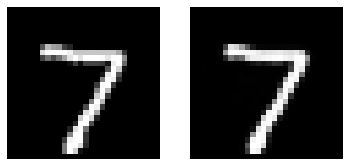

In [58]:
for i, image in enumerate([x, x_rec]):
  image = image.view(28, 28).detach().cpu().numpy()
  plt.subplot(1,2,i+1)
  plt.imshow(image, cmap='binary_r')
  plt.axis('off')
plt.show()